<a href="https://colab.research.google.com/github/Thejas-vishnu/Projects/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Cancer prediction**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rw_dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/capestone/Cancer/Copy of cancer.csv')

In [3]:
rw_dt.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
rw_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
rw_dt.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
rw_dt.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
rw_dt['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

There are no columns with null values, so no need to handle them, except the 'column Unnamed: 32', hence will be droping the column.
And also dropping the id column as it is all completely unique values

In [8]:
rw_dt.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)


In [9]:
rw_dt.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [10]:
rw_dt.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
rw_dt.shape

(569, 31)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(rw_dt, random_state = 10, stratify = rw_dt['diagnosis'])

In [14]:
train['diagnosis'].value_counts()

B    267
M    159
Name: diagnosis, dtype: int64

In [15]:
encode = {'B':0,'M':1}

In [16]:
rw_dt['diagnosis'] = rw_dt['diagnosis'].map(encode)

In [17]:
correl = rw_dt.corr()

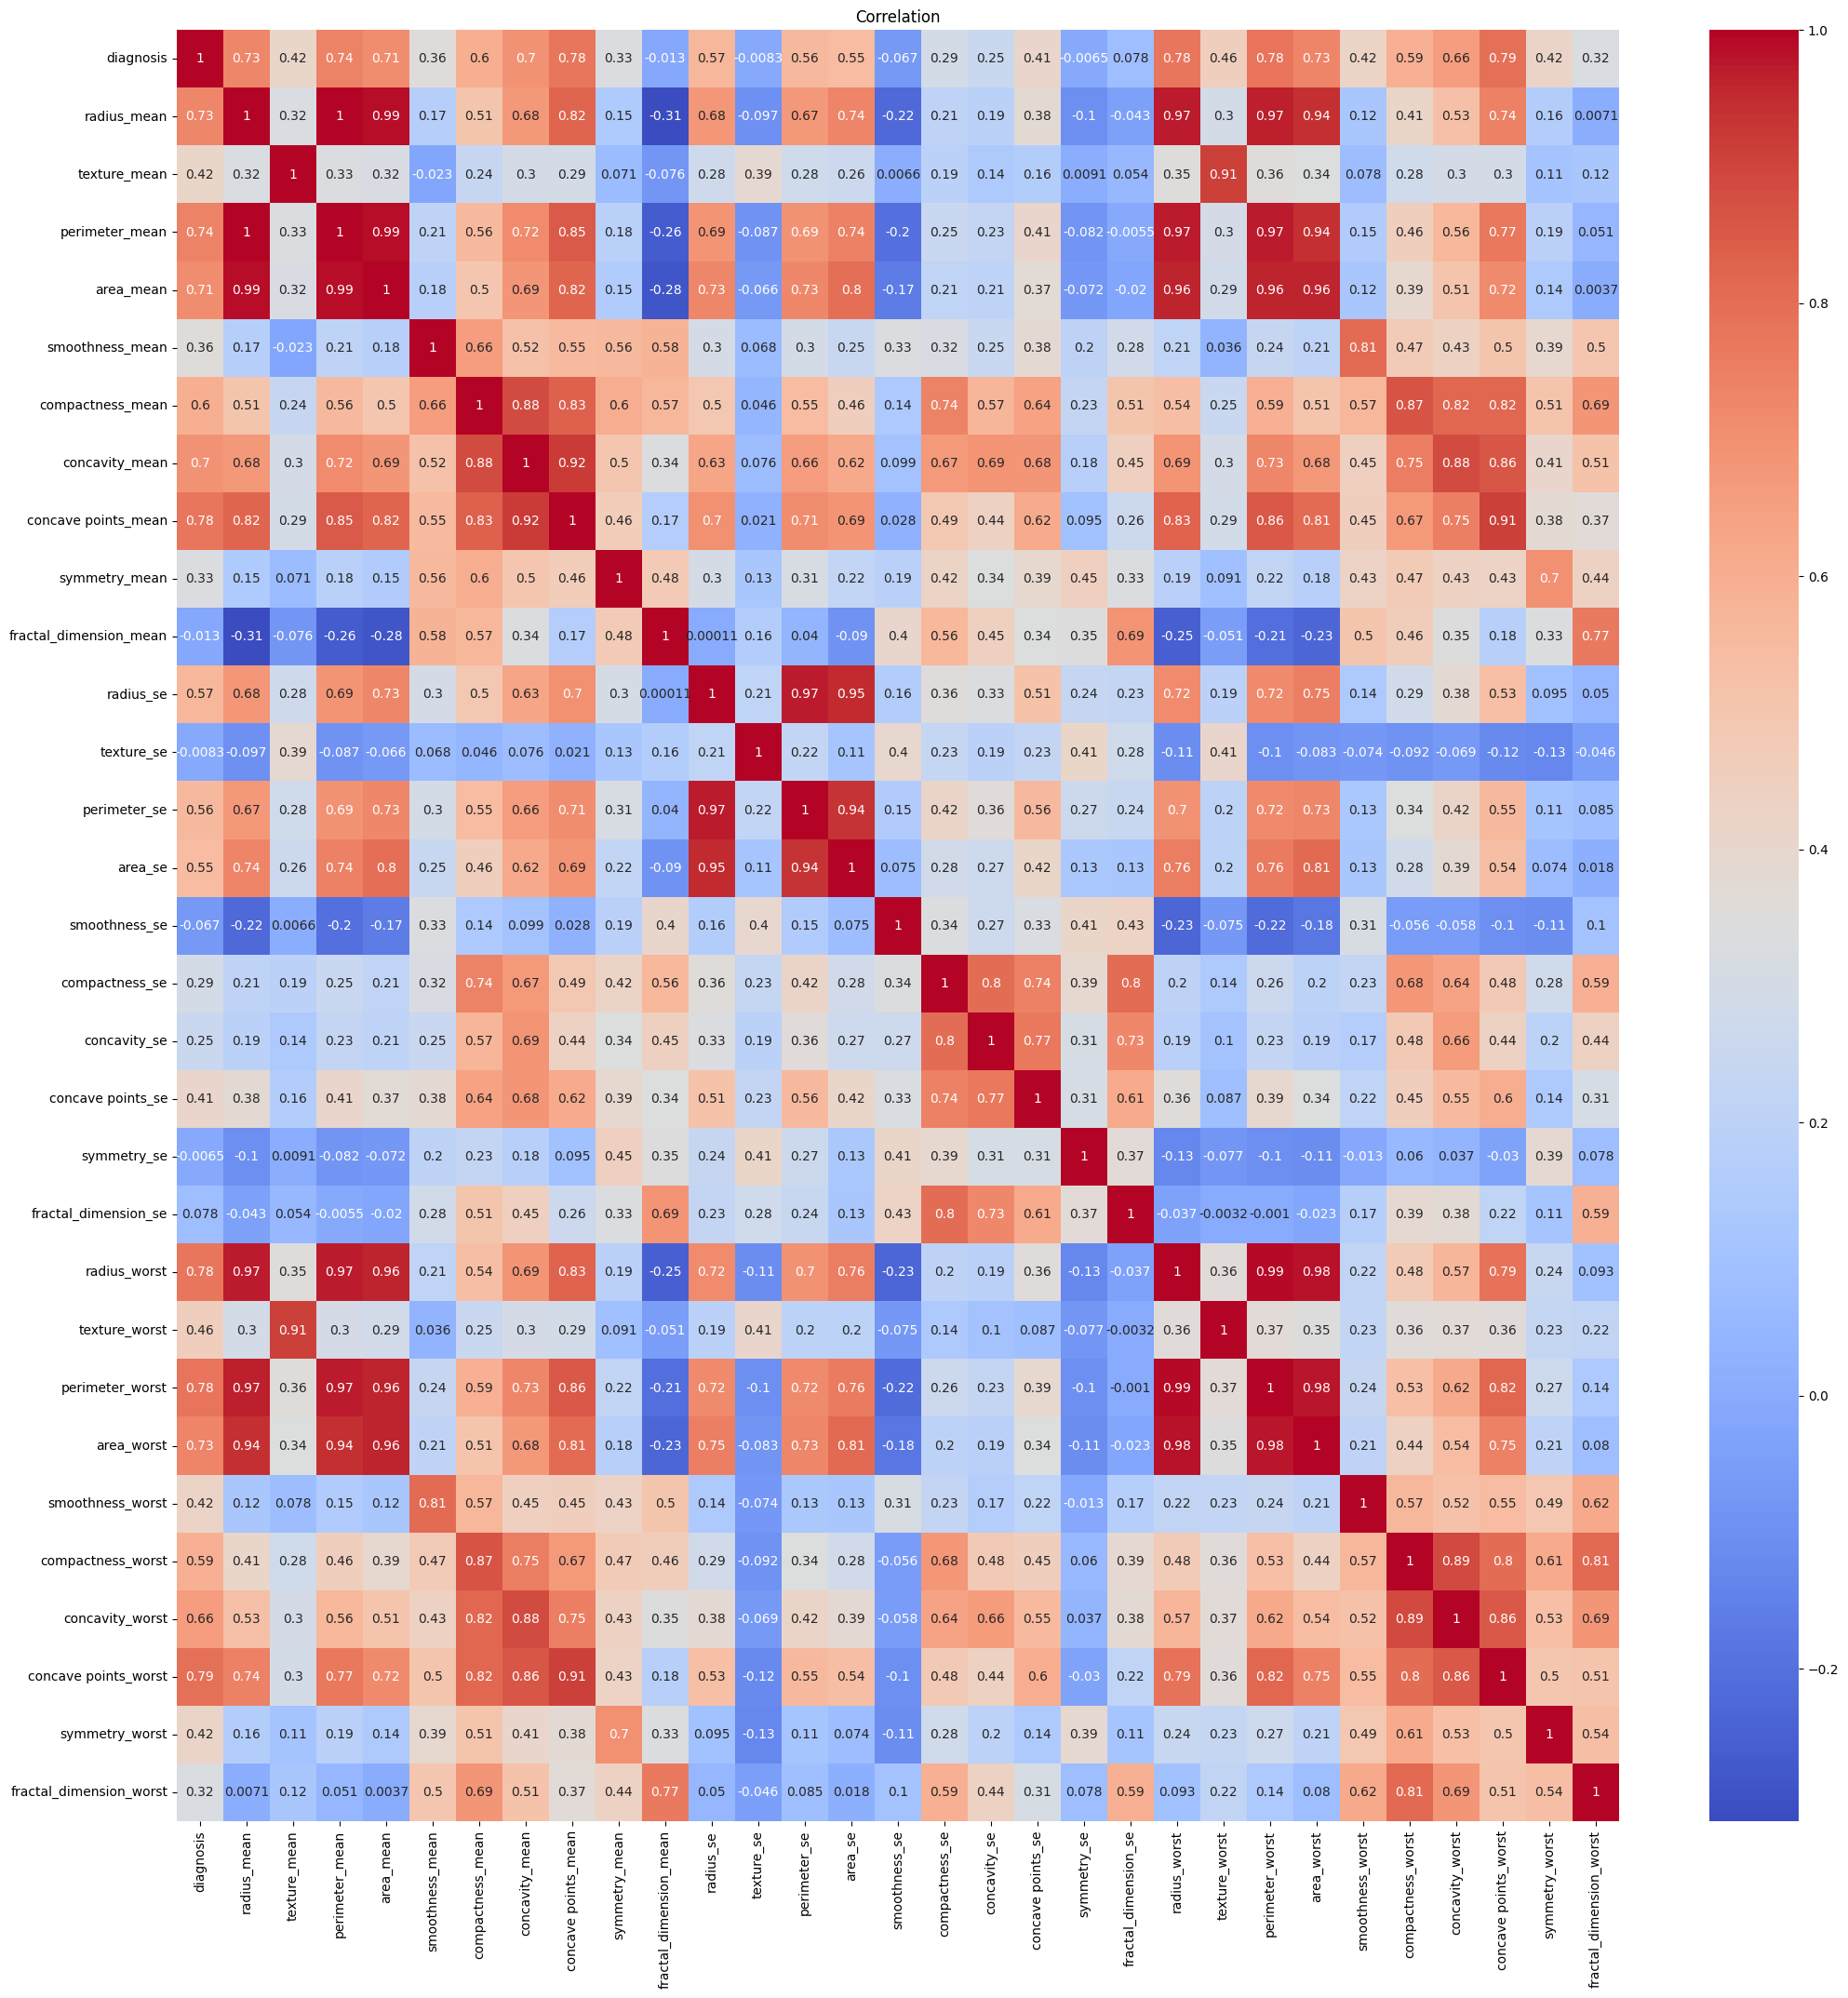

In [18]:
plt.figure(figsize = (25, 25))
sns.heatmap(correl, annot = True, cmap = 'coolwarm')
plt.title('Correlation')
plt.show()

In [19]:
encode

{'B': 0, 'M': 1}

In [20]:
features = rw_dt.columns

In [21]:
high_corr_features = []

for i in range(len(correl.columns)):
    for j in range(i + 1, len(correl.columns)):
        if abs(correl.iloc[i, j]) > 0.95:
            high_corr_features.append((features[i], features[j], correl.iloc[i, j]))

for feature_pair in high_corr_features:
    print(f"Features: {feature_pair[0]}, {feature_pair[1]}, Correlation: {feature_pair[2]}")


Features: radius_mean, perimeter_mean, Correlation: 0.9978552814938109
Features: radius_mean, area_mean, Correlation: 0.9873571700566127
Features: radius_mean, radius_worst, Correlation: 0.9695389726112055
Features: radius_mean, perimeter_worst, Correlation: 0.9651365139559871
Features: perimeter_mean, area_mean, Correlation: 0.9865068039913907
Features: perimeter_mean, radius_worst, Correlation: 0.9694763634663146
Features: perimeter_mean, perimeter_worst, Correlation: 0.9703868870426394
Features: area_mean, radius_worst, Correlation: 0.9627460860470841
Features: area_mean, perimeter_worst, Correlation: 0.9591195743552645
Features: area_mean, area_worst, Correlation: 0.9592133256498998
Features: radius_se, perimeter_se, Correlation: 0.9727936770160764
Features: radius_se, area_se, Correlation: 0.951830112110991
Features: radius_worst, perimeter_worst, Correlation: 0.993707916102949
Features: radius_worst, area_worst, Correlation: 0.9840145644590742
Features: perimeter_worst, area_wors

In [22]:
rw_dt['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [23]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC



In [24]:
X = rw_dt.drop('diagnosis', axis=1)
y = rw_dt['diagnosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
ridge = Ridge()
model = SelectFromModel(ridge)
pipeline = Pipeline([
    ('scaler', scaler),
    ('feature_selection', model),
    ('random_forest', RandomForestClassifier(random_state=42))
])

param_grid = {
    'feature_selection__estimator__alpha': [0.1, 1.0, 10.0],
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 5, 10],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)

grid_search.fit(X_train, y_train)

predictions = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Random Forest Accuracy:", accuracy)
print("Best parameters:", grid_search.best_params_)

Random Forest Accuracy: 0.956140350877193
Best parameters: {'feature_selection__estimator__alpha': 0.1, 'random_forest__max_depth': None, 'random_forest__n_estimators': 100}


In [28]:
model = SelectFromModel(ridge)
X_train_selected = model.fit_transform(X_train_scaled, y_train)
X_test_selected = model.transform(X_test_scaled)
svm = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm, param_grid, cv=5)

grid_search.fit(X_train_selected, y_train)

predictions = grid_search.predict(X_test_selected)

accuracy = accuracy_score(y_test, predictions)

print("SVM Accuracy:", accuracy)
print("Best parameters:", grid_search.best_params_)


SVM Accuracy: 0.956140350877193
Best parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
